# CNN VGG16的结构提取图像特征，然后建立MLP模型

In [2]:
# load the data
from keras.utils import load_img, img_to_array
img_path = './data/dog_cat/test/1.jpg'
img = load_img(img_path,target_size=(224,224))
img = img_to_array(img)
type(img)

numpy.ndarray

In [6]:
# establish the model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
model_vgg = VGG16(weights='imagenet', include_top=False)
x = np.expand_dims(img, axis = 0)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


In [9]:
# 特征提取
features = model_vgg.predict(x)
print(features.shape)


1/1 [==============================] - 0s 202ms/step
(1, 7, 7, 512)


In [10]:
# flatter
features = features.reshape(1,7*7*512)
print(features.shape)

(1, 25088)


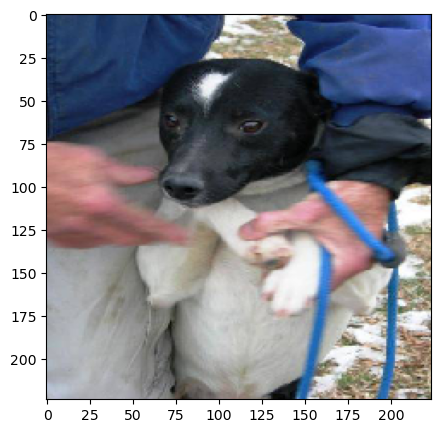

In [11]:
# visulize the data
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5,5))
img1 = load_img(img_path,target_size=(224,224))
plt.imshow(img1)
plt.show()

In [19]:
# load image and preprocess it with VGG16 structure
from keras.utils import load_img,img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input
import numpy as np

model_vgg =  VGG16(weights='imagenet', include_top=False)

# define a method to load and preprocess the image
def modelProcess(img_path, model):
    img = load_img(img_path,target_size=(224,224))
    img = img_to_array(img)
    x = np.expand_dims(img, axis = 0)
    x = preprocess_input(x)
    x_vgg = model.predict(x)
    x_vgg = x_vgg.reshape(1,25088)
    return x_vgg
# list the name of the training datasets 
import os
folder = "data/dog_cat/train/dogs_less"
dirs = os.listdir(folder)
img_path = []
for i in dirs:
    if os.path.splitext(i)[1] == ".jpg":
        img_path.append(i)
img_path = [folder+"//"+i for i in img_path]
# process the img
features1 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    features_i = modelProcess(img_path[i], model_vgg)
    print('Preprocessed:',img_path[i])
    features1[i] = features_i





1/1 [==============================] - 1s 1s/step
Preprocessed: data/dog_cat/train/dogs_less//dog.0.jpg
1/1 [==============================] - 0s 195ms/step
Preprocessed: data/dog_cat/train/dogs_less//dog.1.jpg
1/1 [==============================] - 0s 195ms/step
Preprocessed: data/dog_cat/train/dogs_less//dog.10.jpg
1/1 [==============================] - 0s 189ms/step
Preprocessed: data/dog_cat/train/dogs_less//dog.100.jpg
1/1 [==============================] - 0s 203ms/step
Preprocessed: data/dog_cat/train/dogs_less//dog.101.jpg
1/1 [==============================] - 0s 174ms/step
Preprocessed: data/dog_cat/train/dogs_less//dog.102.jpg
1/1 [==============================] - 0s 192ms/step
Preprocessed: data/dog_cat/train/dogs_less//dog.103.jpg
1/1 [==============================] - 0s 204ms/step
Preprocessed: data/dog_cat/train/dogs_less//dog.104.jpg
1/1 [==============================] - 0s 206ms/step
Preprocessed: data/dog_cat/train/dogs_less//dog.105.jpg
1/1 [======================

In [20]:
# process the cats
folder = "data/dog_cat/train/cats_less"
dirs = os.listdir(folder)
img_path = []
for i in dirs:
    if os.path.splitext(i)[1] == ".jpg":
        img_path.append(i)
img_path = [folder+"//"+i for i in img_path]
# process the img
features2 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    features_i = modelProcess(img_path[i], model_vgg)
    print('Preprocessed:',img_path[i])
    features2[i] = features_i
# label the results
print(features2.shape)


1/1 [==============================] - 0s 210ms/step
Preprocessed: data/dog_cat/train/cats_less//cat.0.jpg
1/1 [==============================] - 0s 181ms/step
Preprocessed: data/dog_cat/train/cats_less//cat.1.jpg
1/1 [==============================] - 0s 175ms/step
Preprocessed: data/dog_cat/train/cats_less//cat.10.jpg
1/1 [==============================] - 0s 221ms/step
Preprocessed: data/dog_cat/train/cats_less//cat.100.jpg
1/1 [==============================] - 0s 219ms/step
Preprocessed: data/dog_cat/train/cats_less//cat.101.jpg
1/1 [==============================] - 0s 187ms/step
Preprocessed: data/dog_cat/train/cats_less//cat.102.jpg
1/1 [==============================] - 0s 219ms/step
Preprocessed: data/dog_cat/train/cats_less//cat.103.jpg
1/1 [==============================] - 0s 262ms/step
Preprocessed: data/dog_cat/train/cats_less//cat.104.jpg
1/1 [==============================] - 0s 190ms/step
Preprocessed: data/dog_cat/train/cats_less//cat.105.jpg
1/1 [===================

In [25]:
# label the results
print(features1.shape,features2.shape)
y1 = np.zeros(583)
y2 = np.ones(310)

#generate the training data
x = np.concatenate((features1, features2),axis = 0)
y = np.concatenate((y1,y2), axis = 0)
y = y.reshape(-1,1)
print(x.shape,y.shape)

(583, 25088) (310, 25088)
(893, 25088) (893, 1)


In [34]:
# split the training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3, random_state=50)
print(x_train.shape, x_test.shape,y_train.shape)

(625, 25088) (268, 25088) (625, 1)


In [35]:
# set up the mlp model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units = 10, activation = 'relu', input_dim=25088))
model.add(Dense(units=1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                250890    
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 250,901
Trainable params: 250,901
Non-trainable params: 0
_________________________________________________________________


In [36]:
# config the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
20/20 [==============================] - 2s 40ms/step - loss: 1.1976 - accuracy: 0.8544
Epoch 2/50
20/20 [==============================] - 1s 36ms/step - loss: 0.1280 - accuracy: 0.9104
Epoch 3/50
20/20 [==============================] - 1s 34ms/step - loss: 0.0665 - accuracy: 0.9536
Epoch 4/50
20/20 [==============================] - 1s 35ms/step - loss: 0.0429 - accuracy: 0.9872
Epoch 5/50
20/20 [==============================] - 1s 36ms/step - loss: 0.0419 - accuracy: 0.9920
Epoch 6/50
20/20 [==============================] - 1s 30ms/step - loss: 0.0299 - accuracy: 0.9952
Epoch 7/50
20/20 [==============================] - 1s 34ms/step - loss: 0.0297 - accuracy: 0.9952
Epoch 8/50
20/20 [==============================] - 1s 39ms/step - loss: 0.0294 - accuracy: 0.9952
Epoch 9/50
20/20 [==============================] - 1s 40ms/step - loss: 0.0207 - accuracy: 0.9952
Epoch 10/50
20/20 [==============================] - 1s 38ms/step - loss: 0.0413 - accuracy: 0.9968
Epoch 11/

In [44]:
# evaluate the accuracy
from sklearn.metrics import accuracy_score
y_train_predict = model.predict(x_train)
y_train_predict = np.round(y_train_predict)
print(y_train_predict.shape)
print(y_train.shape)

accurancy_train = accuracy_score(y_train_predict,y_train)
print(accurancy_train)

20/20 [==============================] - 1s 37ms/step
(625, 1)
(625, 1)
0.9984


In [46]:
# evaluate the test data accurancy
y_test_predict = model.predict(x_test)
y_test_predict = np.round(y_test_predict)
accurancy_test = accuracy_score(y_test_predict,y_test)
print(accurancy_test)

9/9 [==============================] - 0s 40ms/step
0.9701492537313433


In [49]:
# test the image
img_path = 'cat.jpg'
img = load_img(img_path,target_size=(224,224))
img = img_to_array(img)
x = np.expand_dims(img, axis = 0)
x = preprocess_input(x)
features = model_vgg.predict(x)
features = features.reshape(1,7*7*512)
result = model.predict(features)
print(result)

1/1 [==============================] - 0s 44ms/step
[[1.]]


1/1 [==============================] - 0s 53ms/step
[[0.]]
1/1 [==============================] - 0s 73ms/step
[[0.]]
1/1 [==============================] - 0s 48ms/step
[[0.]]
1/1 [==============================] - 0s 50ms/step
[[0.]]
1/1 [==============================] - 0s 48ms/step
[[1.]]
1/1 [==============================] - 0s 46ms/step
[[1.]]
1/1 [==============================] - 0s 47ms/step
[[1.]]
1/1 [==============================] - 0s 40ms/step
[[1.]]
1/1 [==============================] - 0s 50ms/step
[[1.]]


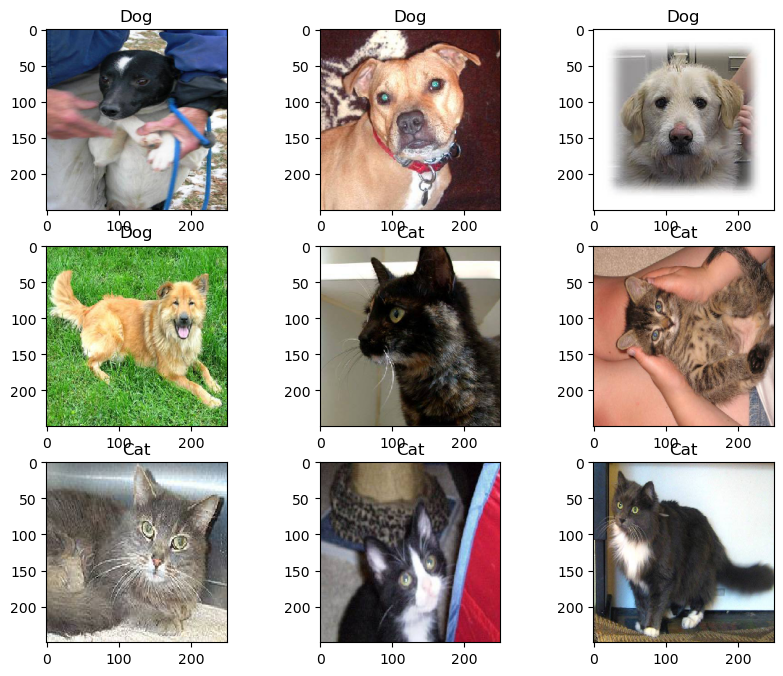

In [51]:
# predict on multiple images
import matplotlib as mlp
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.utils import load_img, img_to_array
from keras.models import load_model
a = [i for i in range(1,10)]
fig = plt.figure(figsize=(10,140))
for i in a:
    img_name = './data./dog_cat/test/'+ str(i) + '.jpg'
    img_ori = load_img(img_name,target_size=(224,224))
    img = img_to_array(img_ori)
    x = np.expand_dims(img, axis = 0)
    x = preprocess_input(x)
    features = model_vgg.predict(x)
    features = features.reshape(1,7*7*512)
    result = model.predict(features)
    result = np.round(result)
    img_ori = load_img(img_name,target_size=(250,250))
    plt.subplot(50,3,i)
    plt.imshow(img_ori)
    print(result)
    #plt.title(result)
    plt.title('Dog' if result[0] == 0 else 'Cat' )
plt.show()